In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread
import numpy as np
import os
import cv2

In [87]:
class Image:
    # initialize, show and save methods
    #------------------------------------------------------
    def __init__(self, path_to_image: str) -> None:
        self.image = imread(path_to_image)
    #------------------------------------------------------
    def show_img(self) -> None:
        plt.imshow(self.image)
        plt.axis('off')
        plt.show()
    #------------------------------------------------------
    def save_img(self, name: str, path: str = '') -> None:
        file_path = os.path.join(path, name + '.jpg')
        plt.imsave(file_path, self.image)
        print(f"Image saved at: {file_path}")
    # image convolution methods
    #------------------------------------------------------
    def make_gray(self) -> None:
        # extract the individual color channels
        blue_channel = self.image[:, :, 0]
        green_channel = self.image[:, :, 1]
        red_channel = self.image[:, :, 2]

        # compute the grayscale values using matrix operations
        gray_values = 0.114 * blue_channel + 0.587 * green_channel + 0.299 * red_channel

        # create a grayscale image by stacking the gray values along the channel dimension
        gray_image = np.stack((gray_values, gray_values, gray_values), axis=-1)

        # update the self.image attribute
        self.image = gray_image.astype(np.uint8)
    #------------------------------------------------------
    def invert_color(self) -> None:
        inverted_image = 255 - self.image
        self.image = inverted_image
    #------------------------------------------------------
    def adjust_brightness(self, factor: float) -> None:
        # convert the image to float for accurate brightness adjustment
        image_float = self.image.astype(np.float32)
        adjusted_image = image_float * factor
        adjusted_image = np.clip(adjusted_image, 0, 255)

        # update the self.image attribute
        self.image = adjusted_image.astype(np.uint8)
    #------------------------------------------------------
    def rotate_image(self, degree: float, direction:str='counterclockwise') -> None:
        angle_radians = np.radians(degree)

        height, width = self.image.shape[:2]

        #  rotation center
        center_x = width // 2
        center_y = height // 2

        cos_theta = np.cos(angle_radians)
        sin_theta = np.sin(angle_radians)

        # rotation matrix
        rotation_matrix = np.array([[cos_theta, -sin_theta, (1 - cos_theta) * center_x + sin_theta * center_y],
                                    [sin_theta, cos_theta, (1 - cos_theta) * center_y - sin_theta * center_x]])

        # choose the rotation matrix based on input direction
        if direction == 'counterclockwise':
            rotation_matrix = cv2.invertAffineTransform(rotation_matrix)

        # apply the rotation to the image
        rotated_image = cv2.warpAffine(self.image, rotation_matrix, (width, height))

        # update the self.image attribute
        self.image = rotated_image
    #------------------------------------------------------
    def resize_image(self, scale_factor: float) -> None:
        height, width = self.image.shape[:2]

        new_height = int(height * scale_factor)
        new_width = int(width * scale_factor)

        scaling_matrix = np.array([[scale_factor, 0, 0], [0, scale_factor, 0]])

        # apply the scaling to the image
        resized_image = cv2.warpAffine(self.image, scaling_matrix, (new_width, new_height))

        # update the self.image attribute
        self.image = resized_image
    #------------------------------------------------------
    def mirror_image(self, axis: str = 'horizontal') -> None:
        """
        Mirror the image along the specified axis.

        Parameters:
            axis (str, optional): The axis along which to perform the mirroring.
                Defaults to 'horizontal'. Can be either 'horizontal' or 'vertical'.
        """
        height, width = self.image.shape[:2]

        # define the reflection matrix
        if axis == 'horizontal':
            reflection_matrix = np.array([[-1, 0, width - 1], [0, 1, 0]], dtype=np.float32)
        elif axis == 'vertical':
            reflection_matrix = np.array([[1, 0, 0], [0, -1, height - 1]], dtype=np.float32)
        else:
            raise ValueError("Invalid mirror axis. Please choose 'horizontal' or 'vertical'.")

        # apply the reflection to the image
        mirrored_image = cv2.warpAffine(self.image, reflection_matrix, (width, height))

        # update the self.image attribute
        self.image = mirrored_image
    #------------------------------------------------------
    def edge_detection(self) -> None:
        """
        Perform edge detection on the image using matrix functions.
        """
        # define the edge detection kernel (Sobel operator)
        kernel_x = np.array([[-1, 0, 1],
                             [-2, 0, 2],
                             [-1, 0, 1]])

        kernel_y = np.array([[-1, -2, -1],
                             [0, 0, 0],
                             [1, 2, 1]])

        # convert the image to grayscale
        gray_image = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)

        # apply the kernels to the grayscale image using convolution
        edges_x = np.abs(cv2.filter2D(gray_image, -1, kernel_x))
        edges_y = np.abs(cv2.filter2D(gray_image, -1, kernel_y))

        # combine the horizontal and vertical edges to obtain the final edge image
        edge_image = np.clip(edges_x + edges_y, 0, 255).astype(np.uint8)

        # update the self.image attribute
        self.image = edge_image
    #------------------------------------------------------
    def built_in_edge_detection(self, threshold1: float, threshold2: float) -> None:
        """
        Perform edge detection on the image using the Canny edge detection algorithm.

        Parameters:
            threshold1 (float): The lower threshold for the hysteresis procedure.
            threshold2 (float): The upper threshold for the hysteresis procedure.
        """
        # Check if the image is already grayscale
        if len(self.image.shape) > 2 and self.image.shape[2] > 1:
            # Convert the image to grayscale
            gray_image = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)
        else:
            # Image is already grayscale
            gray_image = self.image.copy()

        # Apply Canny edge detection
        edges = cv2.Canny(gray_image, threshold1, threshold2)

        # Create a color image with the same dimensions as the original image
        color_edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

        # update the self.image attribute
        self.image = color_edges

<h1><center>Testing The Code</center></h1>

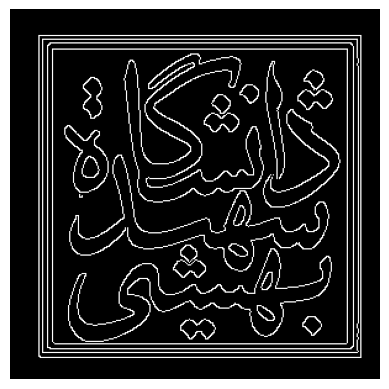

In [94]:
image = Image('img.jpg')
image.built_in_edge_detection(20, 50)
image.show_img()